# **ASSIGNMENT 4**
---

# **Name:** Prashant Agheda
# **PRN No:** 20210804004
# **Subject:** Advanced AI

---

## **Topic:** AUDIO/MUSIC STUDY AND CLASSIFICATION.

## **Aim:** TO STUDY AND PERFORM CLASSIFICATION ON AUDIO/MUSIC STUDY.

### **Steps To Perform:**
Study the following features for any of the sounds:

## **A. Amplitude, envelope and loudness:**

In [ ]:
# !pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing required Libraries.

from pydub import AudioSegment
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import soundfile

In [ ]:
# Assigning files.
inputFile = "/content/Action-Rock.mp3"
outputFile = "Action-Rock.wav"


# Converting mp3 file to wav format.
sound = AudioSegment.from_mp3(inputFile)
sound.export(outputFile, format = "wav")

<_io.BufferedRandom name='Action-Rock.wav'>

In [ ]:
# Loading audio file with librosa library.
# sr means sampling rate.

x, samplingRate = librosa.load("/content/Action-Rock.wav")

In [ ]:
# Using IPython.display.Audio, to play the audio.

import IPython.display as ipd
ipd.Audio('/content/Action-Rock.wav')

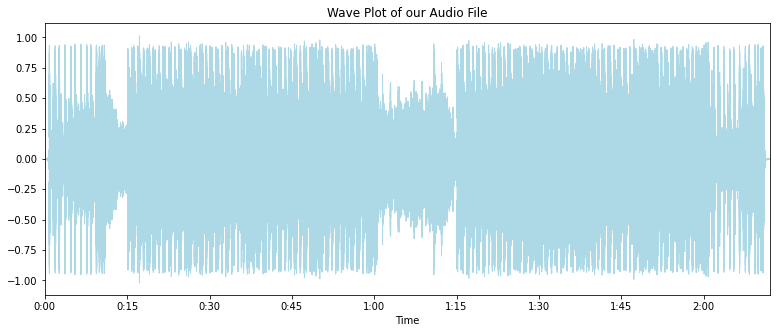

In [ ]:
# Plot the audio array using librosa.display.waveplot.

plt.figure(figsize=(13, 5))
librosa.display.waveplot(x, sr = samplingRate, color = "lightblue")
plt.title("Wave Plot of our Audio File")
plt.show()

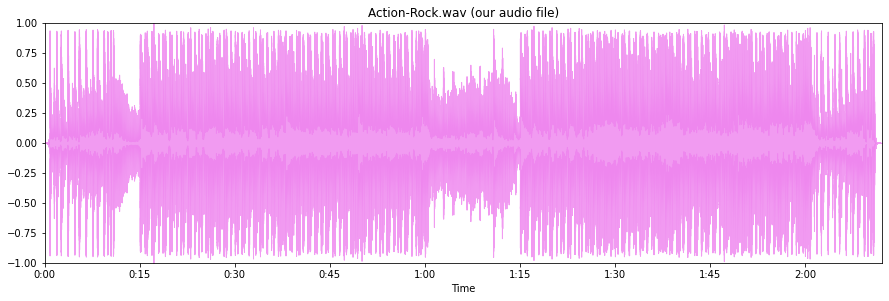

In [ ]:
# Visualize audio signal in the time domain.

plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
librosa.display.waveplot(x, alpha = 0.8, color = "violet")
plt.ylim((-1, 1))
plt.title("Action-Rock.wav (our audio file)")
plt.show()

In [ ]:
# Calculate amplitude envelope for audio (all frames).

frameSize = 1024
hopLength = 512

def amplitude_envelope(signal, frameSize, hopLength):
    # Calculating the amplitude envelope of a signal with a given frame size and hop length.
    amplitudeEnvelope = []
    
    # Calculating amplitude envelope for each frame.
    for i in range(0, len(signal), hopLength): 
        amplitudeEnvelopeCurrentFrame = max(signal[i:i + frameSize]) 
        amplitudeEnvelope.append(amplitudeEnvelopeCurrentFrame)
    
    return np.array(amplitudeEnvelope)

In [ ]:
# Number of frames in amplitude envelope.

ae = amplitude_envelope(x, frameSize, hopLength)
print("Length of Amplitude Envelope: " + str(len(ae)))

Length of Amplitude Envelope: 5691


In [ ]:
# Visualize amplitude envelope.

frames = range(len(ae))
frameToTime = librosa.frames_to_time(frames, hop_length = hopLength)

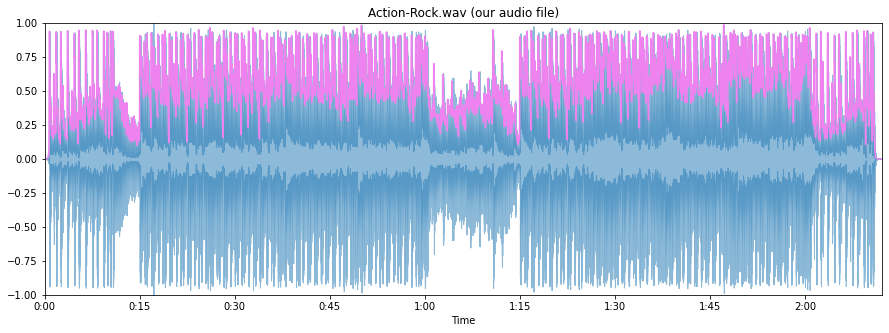

In [ ]:
# Amplitude envelope is graphed in violet color.

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(x, alpha=0.5)
plt.plot(frameToTime, ae, color = "violet")
plt.ylim((-1, 1))
plt.title("Action-Rock.wav (our audio file)")

plt.show()



---



## **B. Spectral centroid:**

In [ ]:
# Compute the time variable for visualization.

frames = range(len(x))
timeForVisualization = librosa.frames_to_time(frames, hop_length = hopLength)
print("Time variable for Visualization: " + str(len(timeForVisualization)))

Time variable for Visualization: 2913750


In [ ]:
# Normalize the spectral centroid for visualization

def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

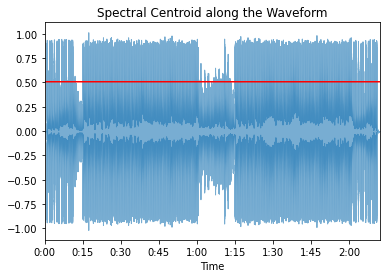

In [ ]:
# Plot the Spectral Centroid along the waveform.

librosa.display.waveplot(x, sr = samplingRate, alpha = 0.6)

# Normalize for visualization purposes.

plt.plot(timeForVisualization, normalize(x), color = "r")
plt.title("Spectral Centroid along the Waveform")
plt.show()



---



## **C. MFCC (Mel-Frequency Cepstral Coefficients):**

In [ ]:
# Extracting MFCCs.

mfccs = librosa.feature.mfcc(y = x, n_mfcc = 13, sr = samplingRate)
print(mfccs.shape)

(13, 5691)


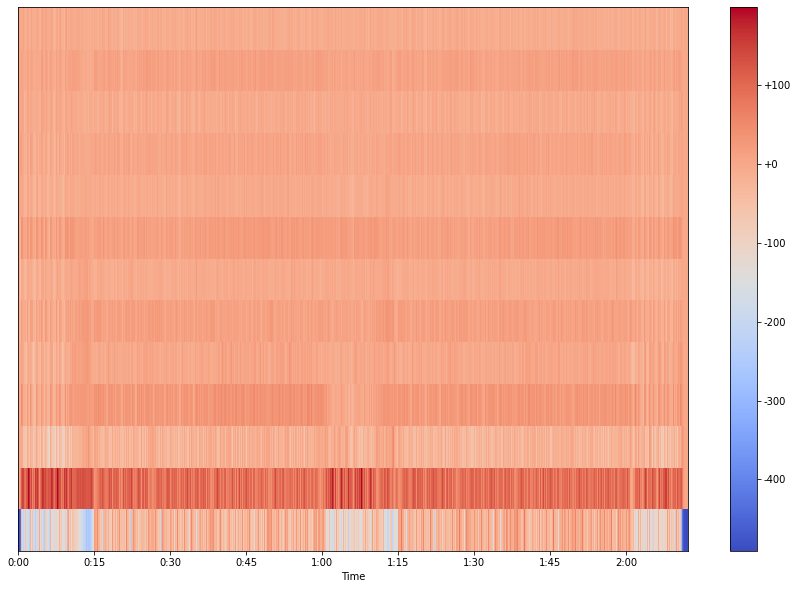

In [ ]:
# Visualize MFCCs.

plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, x_axis = "time", sr = samplingRate)
plt.colorbar(format = "%+2.f")
plt.show()



---



# **D. Pitch salience:**

In [ ]:
# Perform Pitch Scaling using librosa library.

def pitch_scale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(signal, sr, num_semitones)


signal, sr = librosa.load("/content/Action-Rock.wav")
augmented_signal = pitch_scale(signal, sr, 2)
soundfile.write("Augmented-Audio.wav", augmented_signal, sr)

In [ ]:
# Can hear both the audios and see the difference between them.

# Original Audio.
ipd.Audio('/content/Action-Rock.wav')

In [ ]:
# Augmented Audio after scaling pitch.
ipd.Audio('/content/Augmented-Audio.wav')

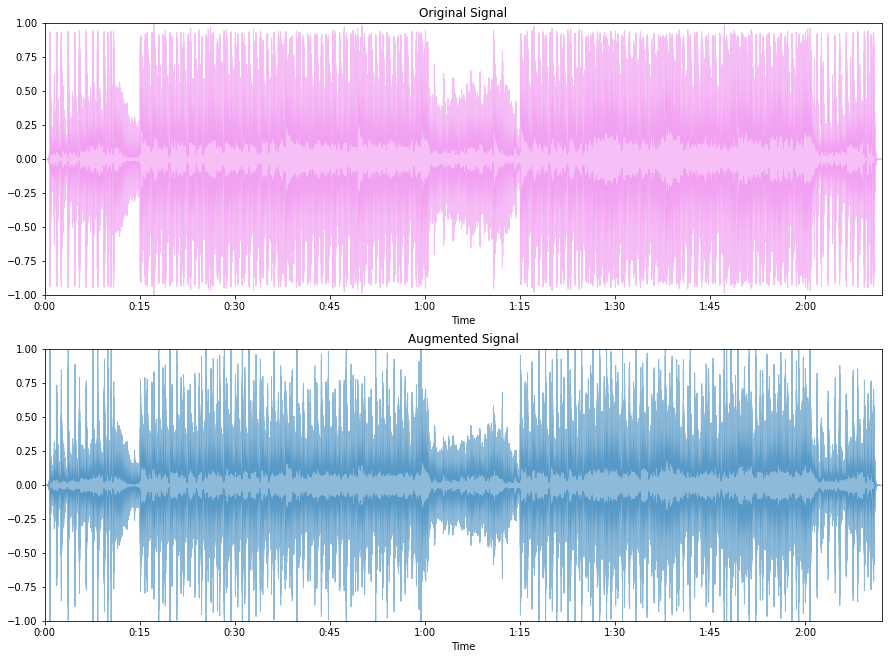

In [ ]:
# Display Output Graph.

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveplot(signal, alpha = 0.5, color = "violet")
plt.ylim((-1, 1))
plt.title("Original Signal")

plt.subplot(3, 1, 2)
librosa.display.waveplot(augmented_signal, alpha = 0.5)
plt.ylim((-1, 1))
plt.title("Augmented Signal")

plt.show()



---



## **E. Chroma Features:**

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


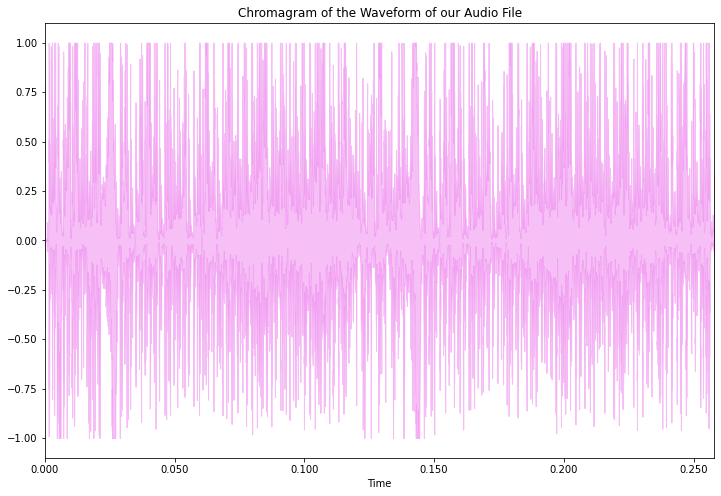

In [ ]:
# Perform Chroma feature extraction using librosa library.

# This computes a chromagram from a waveform or power spectrogram.

plt.figure(figsize=(12, 8))
outputOfChromaFeature = librosa.feature.chroma_stft(y = x, sr = samplingRate, hop_length = hopLength)
librosa.display.waveplot(outputOfChromaFeature, alpha = 0.5, color = "violet")
plt.title("Chromagram of the Waveform of our Audio File")
plt.show()



---



## **Observations:**

1. **Plotted the audio array using Librosa Library in Wave plot form.**
2. **Visualized audio signal in the time domain.**
3. **Calculated amplitude envelope for audio (all frames).**
4. **Visualized the amplitude envelope.**
5. **Computed the time variable for visualization and also Normalized the spectral centroid for visualization.**
6. **Plotted the Spectral Centroid along the waveform.**
7. **Extracted and Visualized MFCCs.**
8. **Done Pitch Scaling on Original Audio file and noticed the difference of the audio when pitch was scaled.**



---

